# COVID-19

# Objective Of The Project.

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

# INTRODUCTION

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

content

# content

This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients.

In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read Data

In [3]:
df=pd.read_csv('Covid Data.csv')

In [4]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


# Preprocessing

In [5]:
df.shape

(1048575, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [7]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [8]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [9]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [10]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [11]:
df.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [12]:
df.duplicated().sum()

812049

In [13]:
# Counts of unique rows in the DataFrame.
df.value_counts().sum()     

1048575

In [14]:
# unique values in columns 
df.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

Preaparing "DATE_DIED" column

In [15]:
# If we have "9999-99-99" values that means this patient is alive.

df["DEAD"] = [2 if each=="9999-99-99" else 1 for each in df.DATE_DIED]

# Droping the columns

we don't need "DATE_DIED" column anymore because we used this feature as a "DEATH" feature.

In [16]:
# Now we can remove the DATE_DIED field
df.drop(columns=['DATE_DIED'], inplace=True)

In [17]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD'],
      dtype='object')

# Visulization

<AxesSubplot:>

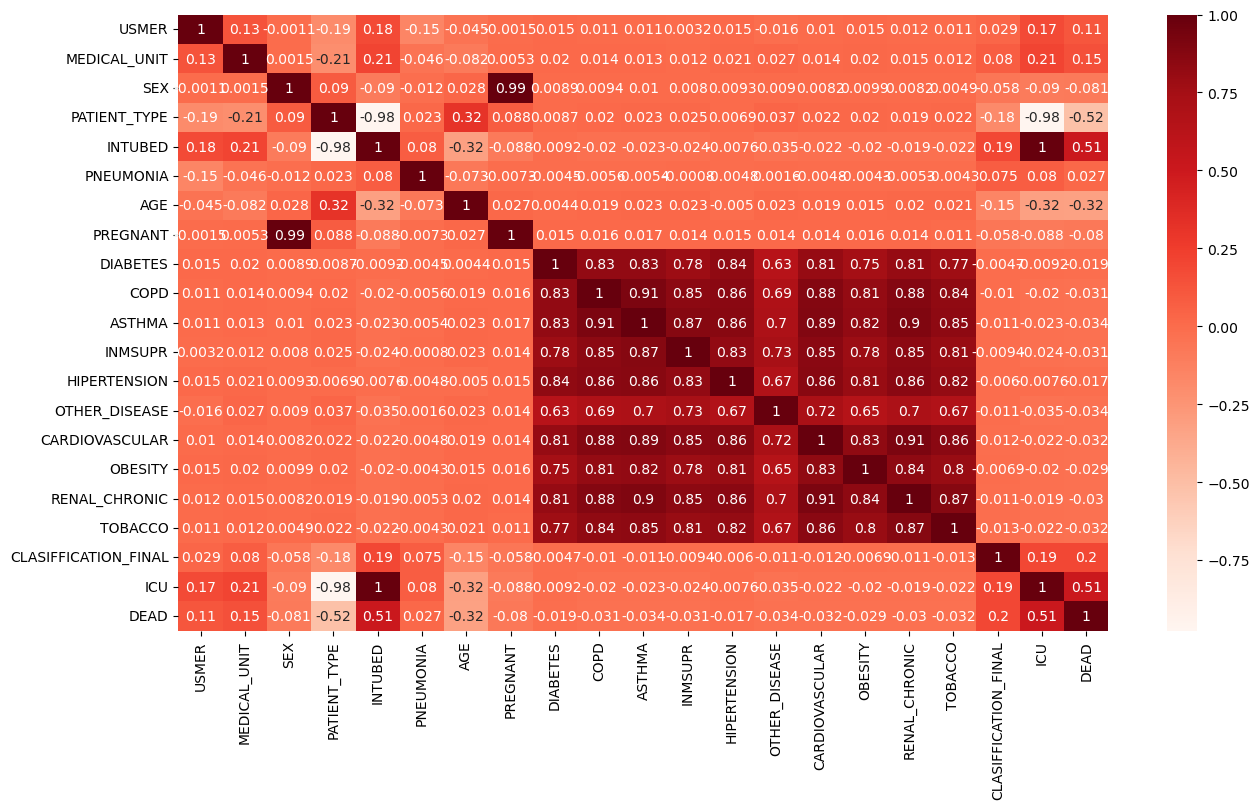

In [18]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(df.corr(), annot = True, cmap = "Reds")

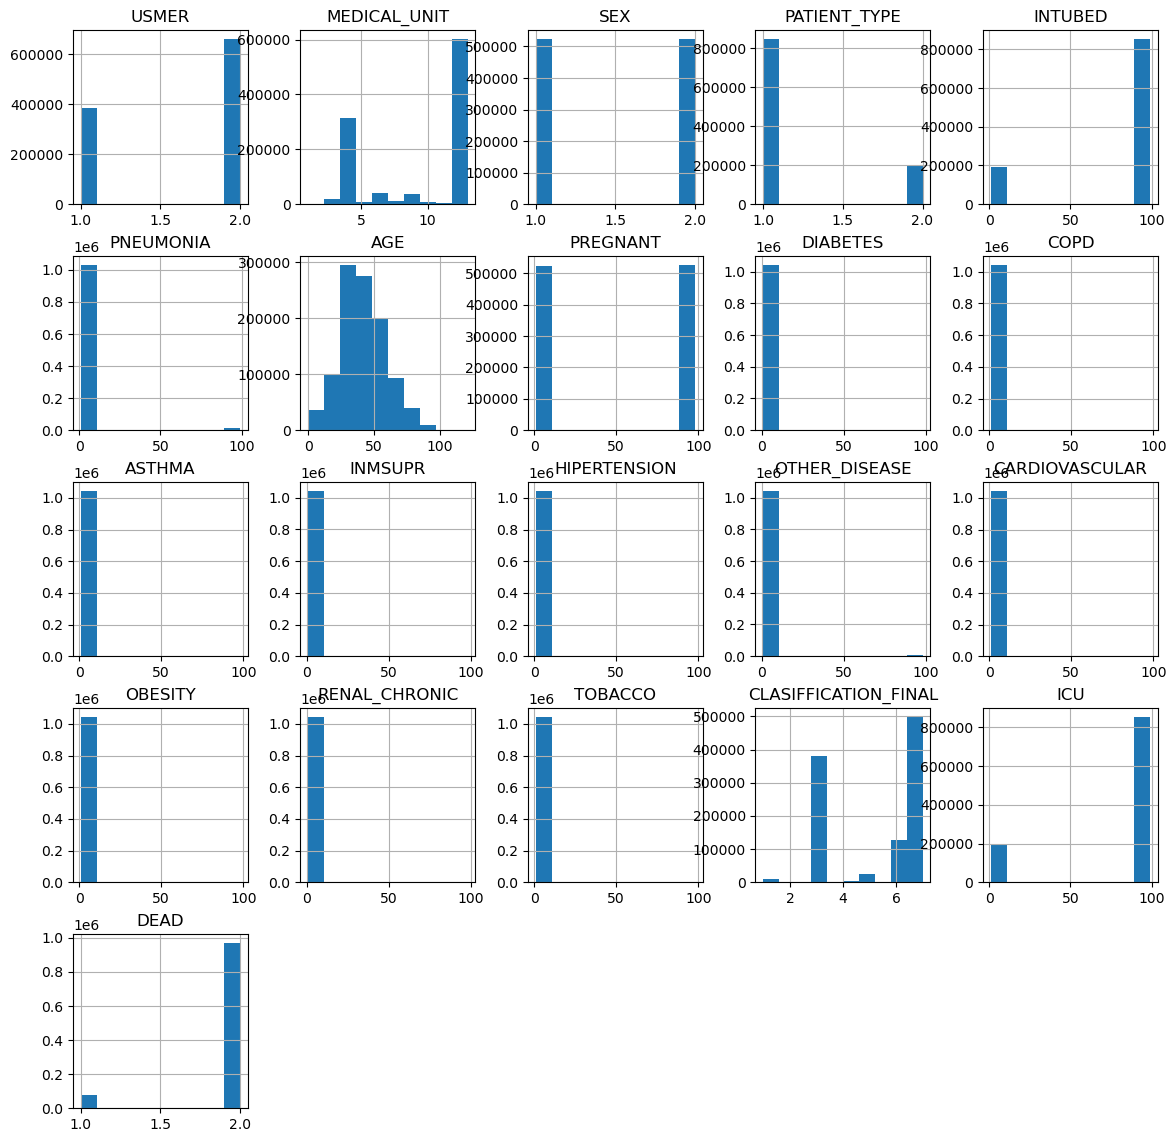

In [19]:
df.hist(bins = 10 , figsize= (14,14))
plt.show()

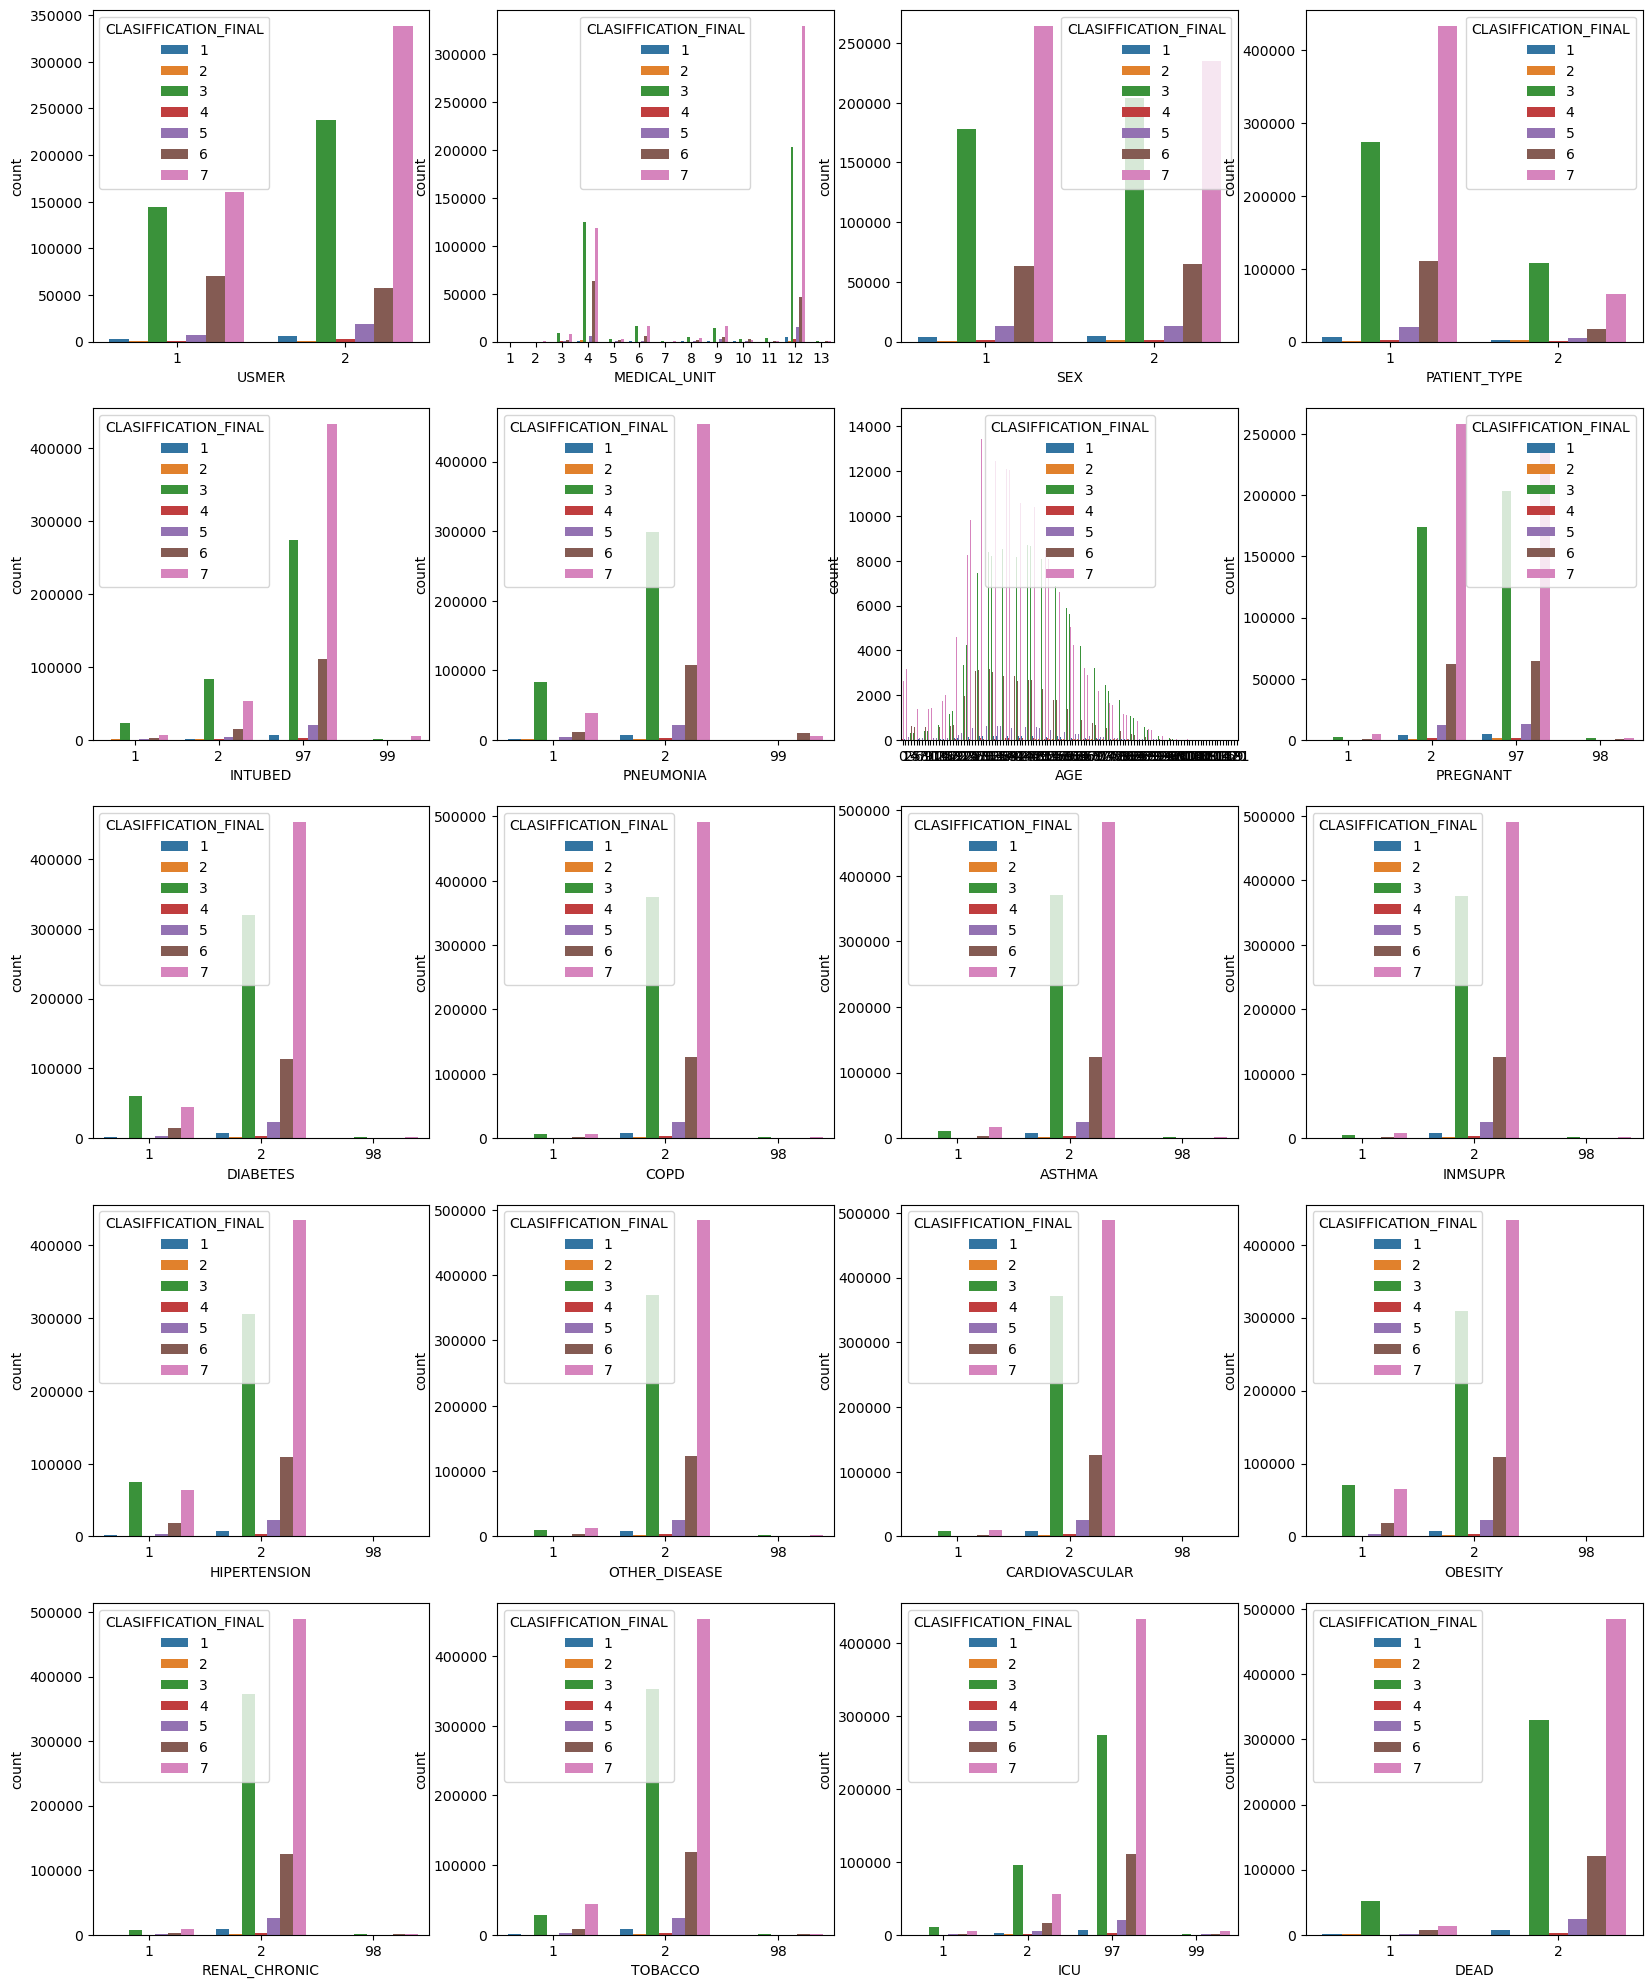

In [20]:
plt.figure(figsize=(20, 25))
index = 1
temp = df.drop("CLASIFFICATION_FINAL", axis = 1)

for i in temp.columns:
    plt.subplot(5, 4, index)
    sns.countplot(data=df, x=i, hue="CLASIFFICATION_FINAL")
    index += 1
plt.show()

<AxesSubplot:xlabel='AGE', ylabel='count'>

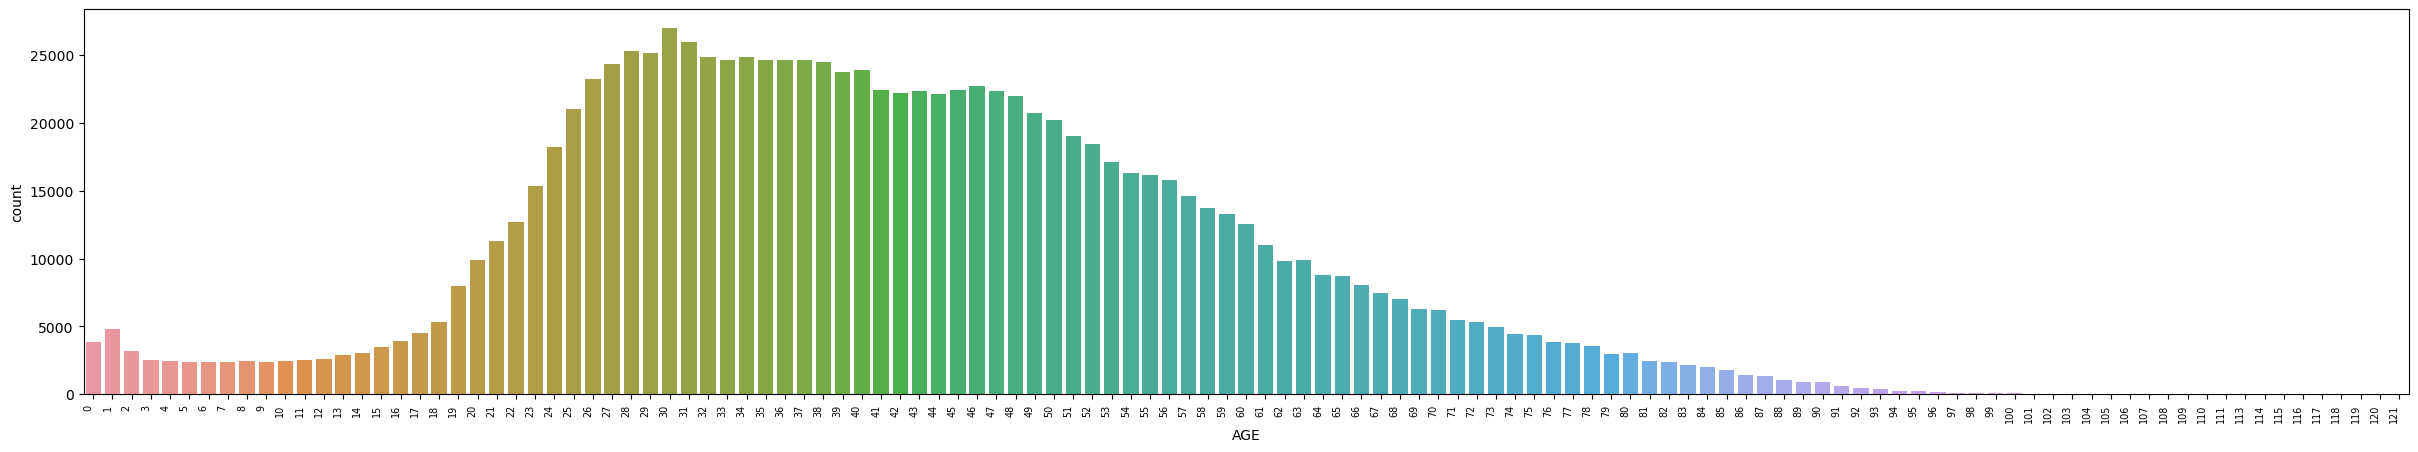

In [21]:
df.head()
plt.figure(figsize=(30,5))
plt.xticks(rotation=90, horizontalalignment='right',fontweight='light',fontsize='x-small' )
sns.countplot(x='AGE', data=df)

Above plot showing us the distribution of cases over age.

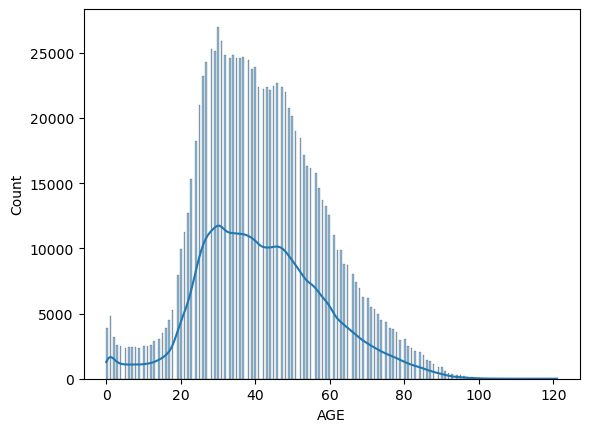

In [22]:
sns.histplot(x=df.AGE, kde = True)
plt.show()

Checking the distribution of the continuous predictor variable

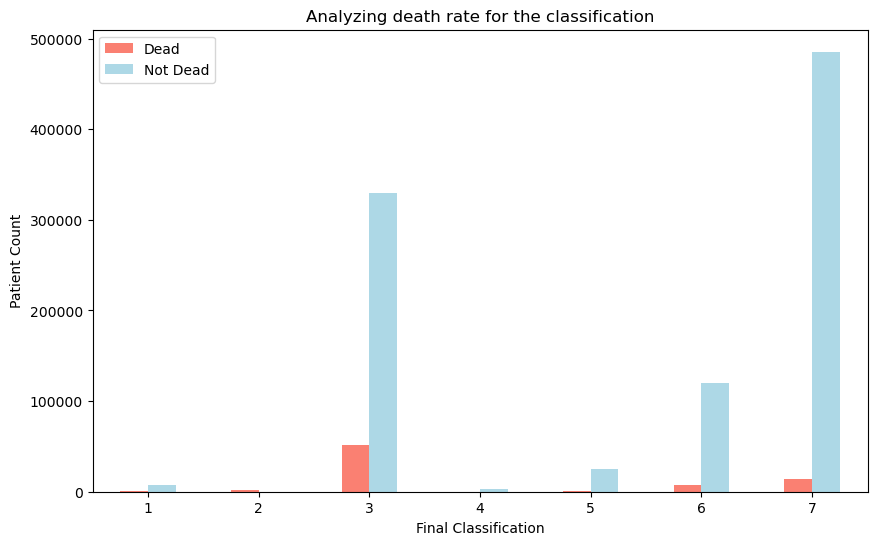

In [23]:
pd.crosstab(df.CLASIFFICATION_FINAL, df.DEAD).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Analyzing death rate for the classification")
plt.xlabel("Final Classification")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.xticks(rotation=0);

Above plot tells us that patients with classification id as 7 has very less chance of death as they are not the carrier of the virus.

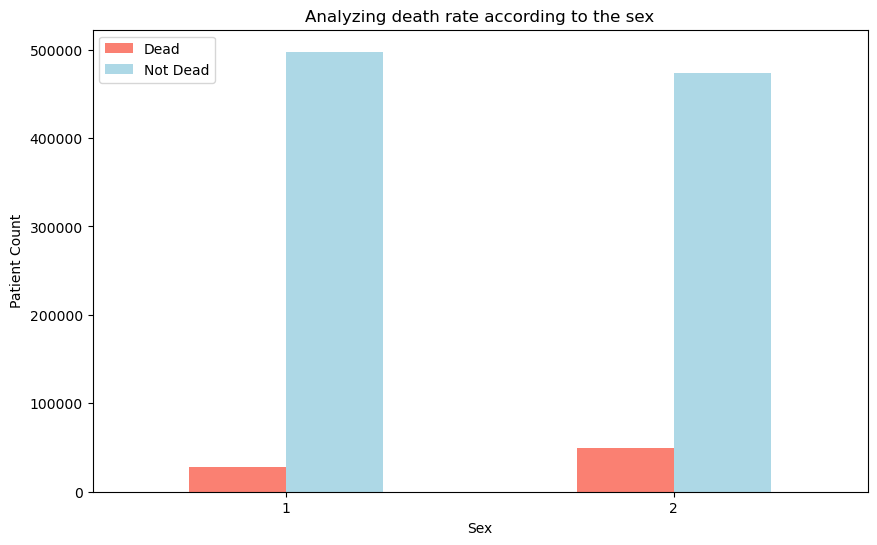

In [24]:
pd.crosstab(df.SEX, df.DEAD).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Analyzing death rate according to the sex")
plt.xlabel("Sex")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.xticks(rotation=0);


Death rate of males are more in comparison to females

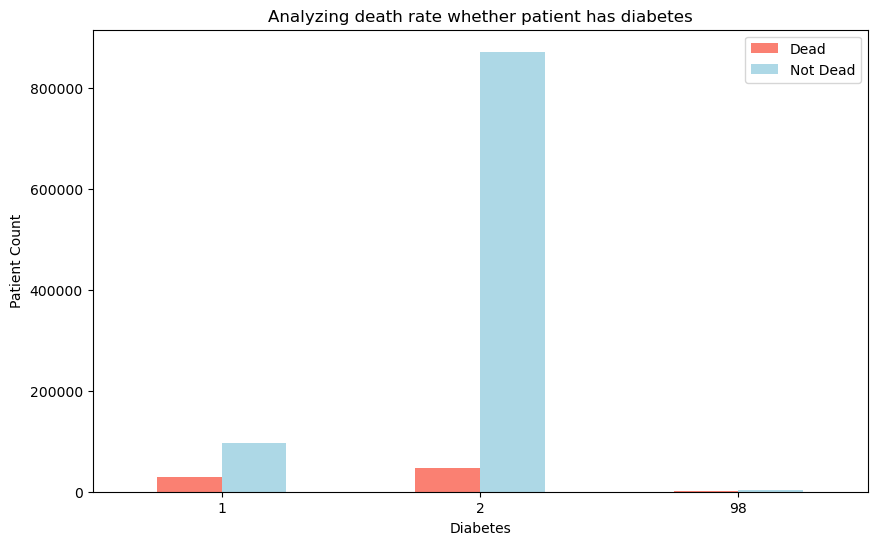

In [25]:
pd.crosstab(df.DIABETES, df.DEAD).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Analyzing death rate whether patient has diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.xticks(rotation=0);

We can see that if patient is not having diabetes, there is more chance that he will not die.

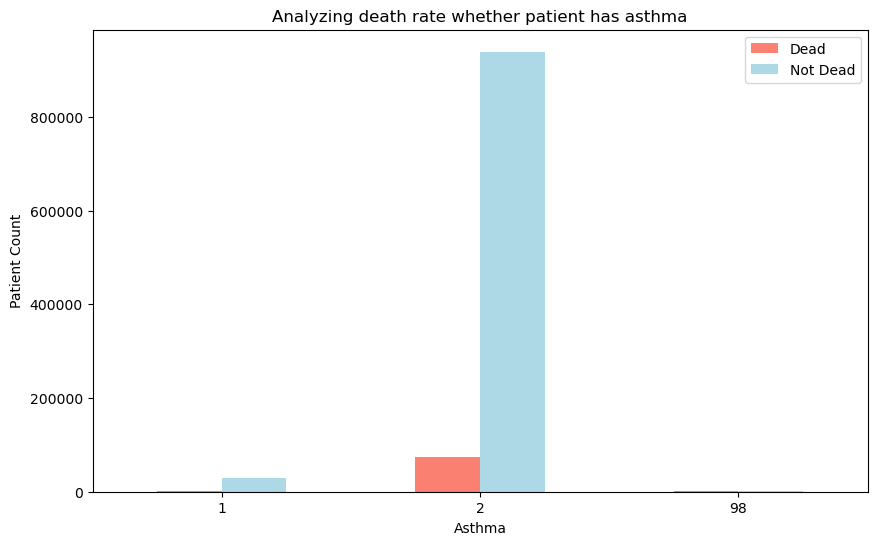

In [26]:
pd.crosstab(df.ASTHMA, df.DEAD).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Analyzing death rate whether patient has asthma")
plt.xlabel("Asthma")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.xticks(rotation=0);

We can see that if patient is not diagonized with Asthma, there is more chance that he will not die.

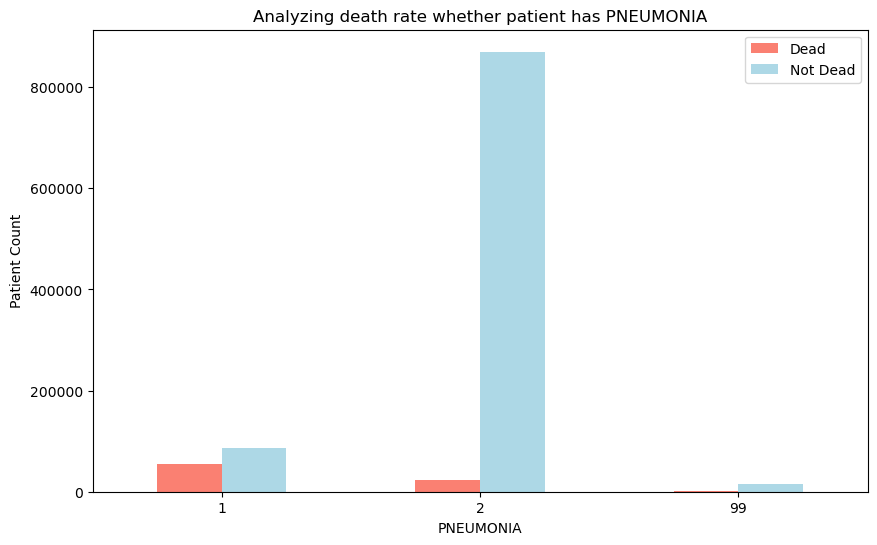

In [27]:
pd.crosstab(df.PNEUMONIA, df.DEAD).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Analyzing death rate whether patient has PNEUMONIA")
plt.xlabel("PNEUMONIA")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.xticks(rotation=0);

Death rate of pneumonia diagonized patients are more in comparison to others

# train test split

In [28]:
x=df.drop('DEAD',axis=1).values
y=df['DEAD'].values

In [29]:
x

array([[ 2,  1,  1, ...,  2,  3, 97],
       [ 2,  1,  2, ...,  2,  5, 97],
       [ 2,  1,  2, ...,  2,  3,  2],
       ...,
       [ 2, 13,  2, ...,  2,  7, 97],
       [ 2, 13,  2, ...,  2,  7, 97],
       [ 2, 13,  2, ...,  2,  7, 97]], dtype=int64)

In [30]:
y

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.8, random_state=42)

# Model 1:Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression()

In [35]:
model.fit(x_train,y_train)

LogisticRegression()

In [36]:
y_predict = model.predict(x_test)

In [37]:
y_predict

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [38]:
model.score(x_train,y_train)

0.9350880957489927

In [39]:
model.score(x_test,y_test)

0.9352716782299788

In [40]:
df_new = pd.DataFrame({'Actual':y_test,'Predicted':y_predict})

In [41]:
df_new

,Actual,Predicted
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
838855,2,2
838856,2,2
838857,2,2
838858,2,2


In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test,y_predict)*100

93.52716782299788

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
performance = confusion_matrix(y_test,y_predict)

In [47]:
performance

array([[ 24212,  37287],
       [ 17011, 760350]], dtype=int64)

In [48]:
from sklearn.metrics import plot_confusion_matrix

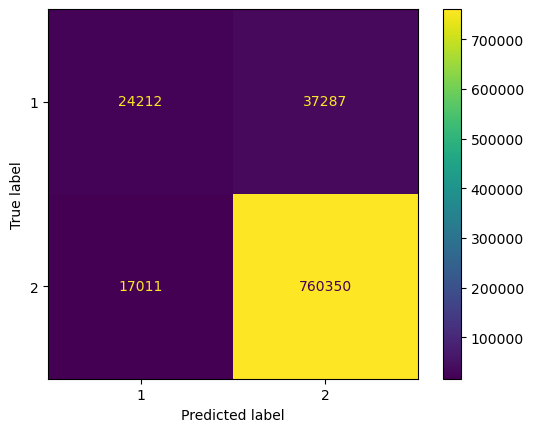

In [49]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [50]:
from sklearn.metrics import classification_report

In [51]:
report =classification_report(y_test,y_predict)

In [52]:
print(report)

              precision    recall  f1-score   support

           1       0.59      0.39      0.47     61499
           2       0.95      0.98      0.97    777361

    accuracy                           0.94    838860
   macro avg       0.77      0.69      0.72    838860
weighted avg       0.93      0.94      0.93    838860



# Model 2: Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
model2 = DecisionTreeClassifier()

In [55]:
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
y_predict = model2.predict(x_test)

In [57]:
y_predict

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [58]:
model2.score(x_train,y_train)

0.9850988245952841

In [59]:
model2.score(x_test,y_test)

0.9319886512648118

In [60]:
df_new = pd.DataFrame({'Actual':y_test,'Predicted':y_predict})

In [61]:
df_new

,Actual,Predicted
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
838855,2,2
838856,2,2
838857,2,2
838858,2,2


In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(y_test,y_predict)*100

93.19886512648118

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
performance = confusion_matrix(y_test,y_predict)

In [66]:
performance

array([[ 34261,  27238],
       [ 29814, 747547]], dtype=int64)

In [67]:
from sklearn.metrics import plot_confusion_matrix

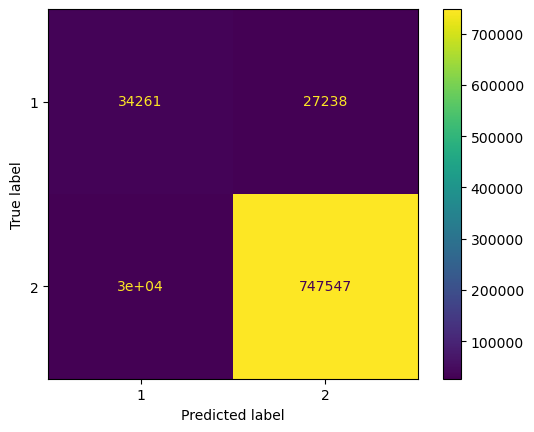

In [68]:
plot_confusion_matrix(model2,x_test,y_test)
plt.show()

In [69]:
from sklearn.metrics import classification_report

In [70]:
report =classification_report(y_test,y_predict)

In [71]:
print(report)

              precision    recall  f1-score   support

           1       0.53      0.56      0.55     61499
           2       0.96      0.96      0.96    777361

    accuracy                           0.93    838860
   macro avg       0.75      0.76      0.75    838860
weighted avg       0.93      0.93      0.93    838860



# Model 3: Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
model3 = RandomForestClassifier()

In [74]:
model3.fit(x_train,y_train)

RandomForestClassifier()

In [75]:
y_predict = model3.predict(x_test)

In [76]:
y_predict

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [77]:
model3.score(x_train,y_train)

0.9850845194668956

In [78]:
model3.score(x_test,y_test)

0.943146651407863

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
accuracy_score(y_test,y_predict)*100

94.3146651407863

In [81]:
from sklearn.metrics import confusion_matrix

In [82]:
performance = confusion_matrix(y_test,y_predict)

In [83]:
performance 

array([[ 33338,  28161],
       [ 19531, 757830]], dtype=int64)

In [84]:
from sklearn.metrics import plot_confusion_matrix

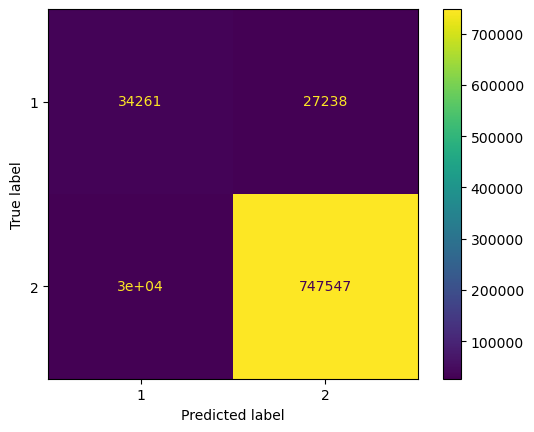

In [85]:
plot_confusion_matrix(model2,x_test,y_test)
plt.show()

In [86]:
from sklearn.metrics import classification_report

In [87]:
report =classification_report(y_test,y_predict)

In [88]:
print(report)

              precision    recall  f1-score   support

           1       0.63      0.54      0.58     61499
           2       0.96      0.97      0.97    777361

    accuracy                           0.94    838860
   macro avg       0.80      0.76      0.78    838860
weighted avg       0.94      0.94      0.94    838860



# Conclusion

- Logistic Regression Score :- 93%
- Decision Tree Score :- 93 %
- Random Forest Score :- 94 %

Our main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

So through problem statement our three classification model performing very good performance to find solution on our problem statement.

 